<a href="https://colab.research.google.com/github/svmamidi/my-project/blob/main/EDA_using_LLMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openai
!pip install langchain




from langchain.llms.openai import OpenAI

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.4/225.4 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.2 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.9.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 794.4/794.4 kB 5.5 MB/s e

In [ ]:
import os
os.environ['OPENAI_API_KEY']=''

In [ ]:
llm = OpenAI()

In [ ]:
!pip install langchain_experimental

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.0/163.0 kB 2.6 MB/s eta 0:00:00


In [ ]:

from langchain_experimental.agents import create_pandas_dataframe_agent
from langchain import PromptTemplate
from langchain.llms.openai import OpenAI



In [ ]:
template_Taxi=(
    "If you do not know the answer,say you don't know.\n"
    "think step by step.\n"
    "\n"
    "Below is the query.\n"
    "Query:{query}\n"
)
prompt=PromptTemplate(template=template_Taxi,input_variables=['query'])

In [ ]:
from google.colab import files


uploaded = files.upload()

Saving nyc_taxi_trip_duration.csv to nyc_taxi_trip_duration.csv


In [ ]:
import pandas as pd
import io

data = pd.read_csv(io.BytesIO(uploaded['nyc_taxi_trip_duration.csv']))
print(data)

               id  vendor_id      pickup_datetime     dropoff_datetime  \
0       id1080784          2  2016-02-29 16:40:21  2016-02-29 16:47:01   
1       id0889885          1  2016-03-11 23:35:37  2016-03-11 23:53:57   
2       id0857912          2  2016-02-21 17:59:33  2016-02-21 18:26:48   
3       id3744273          2  2016-01-05 09:44:31  2016-01-05 10:03:32   
4       id0232939          1  2016-02-17 06:42:23  2016-02-17 06:56:31   
...           ...        ...                  ...                  ...   
729317  id3905982          2  2016-05-21 13:29:38  2016-05-21 13:34:34   
729318  id0102861          1  2016-02-22 00:43:11  2016-02-22 00:48:26   
729319  id0439699          1  2016-04-15 18:56:48  2016-04-15 19:08:01   
729320  id2078912          1  2016-06-19 09:50:47  2016-06-19 09:58:14   
729321  id1053441          2  2016-01-01 17:24:16  2016-01-01 17:44:40   

        passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                     1       

In [ ]:
 agent = create_pandas_dataframe_agent(llm,df=data,verbose=False)

In [ ]:
#agent.run(prompt.format(query='what is this dataset about?'))



> Entering new AgentExecutor chain...
Thought: I should first check the column names to get an idea of what the dataset is about.
Action: python_repl_ast
Action Input: df.columns
Observation: Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')
Thought: The column names do not provide much information. I should check the data type of each column to get a better understanding.
Action: python_repl_ast
Action Input: df.dtypes
Observation: id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object
Thought: The data ty

'This dataset contains information about taxi trips.'

In [ ]:
#agent.run(prompt.format(query='give univarient analysis'))



> Entering new AgentExecutor chain...
Thought: First, we need to import the necessary libraries and functions to perform univariate analysis on a pandas dataframe.
Action: python_repl_ast 
Action Input: import pandas as pd
Observation: 
Thought: Now that we have imported the necessary libraries, we can use the describe() function to get a summary of the numerical columns in the dataframe.
Action: python_repl_ast 
Action Input: df.describe()
Observation:            vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count  729322.000000    729322.000000     729322.000000    729322.000000   
mean        1.535403         1.662055        -73.973513        40.750919   
std         0.498745         1.312446          0.069754         0.033594   
min         1.000000         0.000000       -121.933342        34.712234   
25%         1.000000         1.000000        -73.991859        40.737335   
50%         2.000000         1.000000        -73.981758        40.754070   
75%     

RateLimitError: ignored

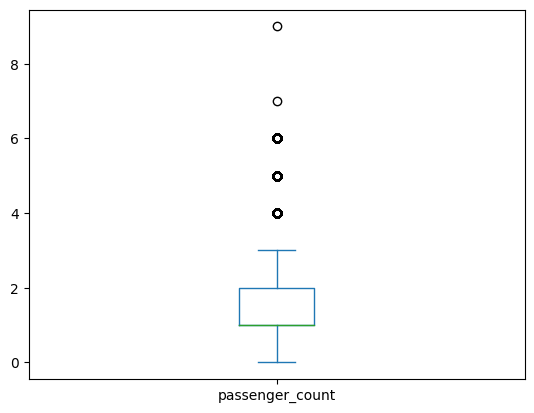

'In order to create a boxplot of the passenger_count column in the dataframe, you can use the code "df[\'passenger_count\'].plot(kind=\'box\')" and then show the plot using "plt.show()".'

In [ ]:
agent.run(prompt.format(query='give box plot of passenger_count '))

In [ ]:
agent.run(prompt.format(query='is dataset has any missing values'))

'No, the dataset does not have any missing values.'